In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.activations import elu
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [2]:
from fonction import *

In [3]:
# Definition of the path of the data
data_path = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\train_set\\mesh_square_B\\data_set_6.csv'

In [4]:
# load the data 
data = np.loadtxt(data_path, delimiter=',')
ind = data[:,0]
data= data[:,1:]
data.shape

(99444, 41)

In [5]:
X_train, X_test, Y_train, Y_test, indice_neg_data = data_preparation(data)

In [6]:
# check the size of the training and test set :
print(" the size of X_train is ",np.shape(X_train))
print(" the size of X_test is ",np.shape(X_test))
print(" the size of Y_train is ",np.shape(Y_train))
print(" the size of Y_test is ",np.shape(Y_test))

 the size of X_train is  (79555, 40)
 the size of X_test is  (19889, 40)
 the size of Y_train is  (79555, 1)
 the size of Y_test is  (19889, 1)


{'whiskers': [<matplotlib.lines.Line2D at 0x25d3dada4e0>,
 'caps': [<matplotlib.lines.Line2D at 0x25d3dadab70>,
 'boxes': [<matplotlib.lines.Line2D at 0x25d3dada0b8>],
 'medians': [<matplotlib.lines.Line2D at 0x25d3dadaf60>],
 'fliers': [<matplotlib.lines.Line2D at 0x25d3dae8588>],
 'means': []}

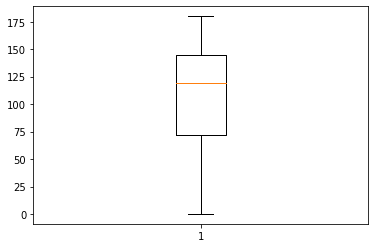

In [15]:
plt.boxplot(Y_test*180/np.pi)

In [9]:
def build_model_base_line(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(1 ,input_shape=(40,)))
    if summary :
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

===================NN architecture==========================
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 41        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
=======================training=============================
Epoch 00240: early stopping
MSE Train: 0.702 | MSE Test: 0.702


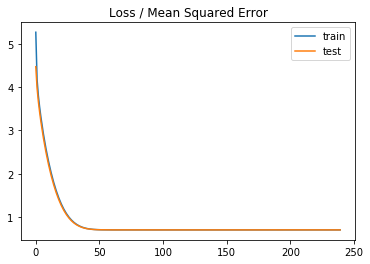

Training time is : 0.28  minute
======================Saving model==========================
Saved model to disk


In [10]:
model_base, train_mse , test_mse = training_NN(build_model_base_line,X_train, X_test, Y_train, Y_test,"model_bl_data_6.h5",batch=1000)

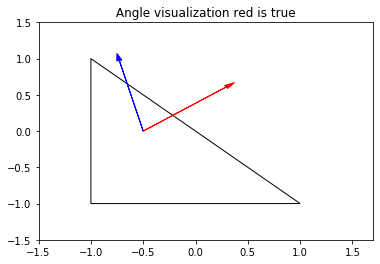

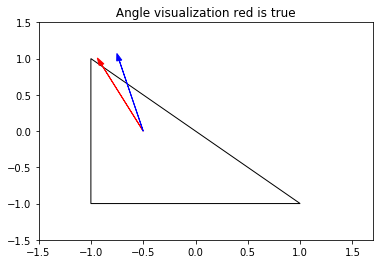

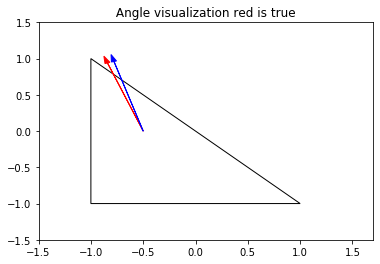

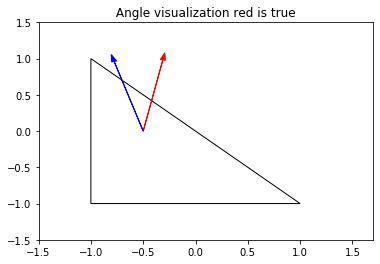

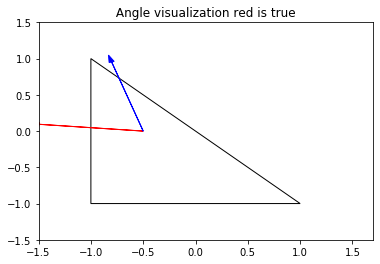

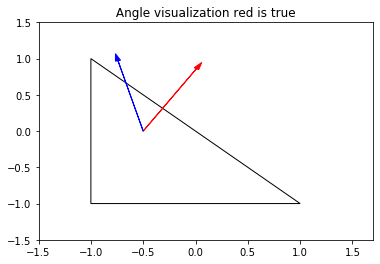

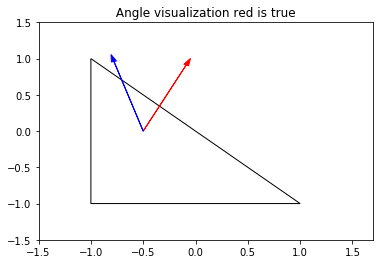

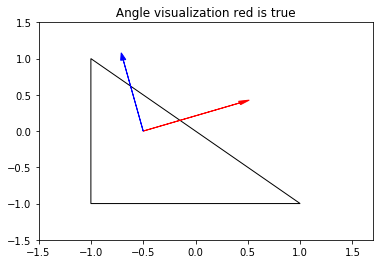

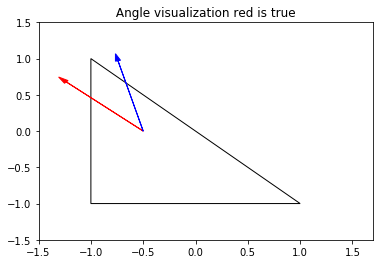

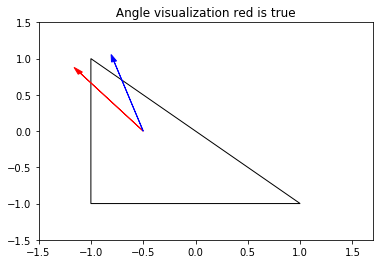

In [9]:
angle_visualization(model_base , X_test , Y_test)

In [7]:
def build_model_3_tanh(summary = True):
    
    #architecture
    model = Sequential()
    
    model.add(Dense(40 ,input_shape=(40,)))
    model.add(BatchNormalization())        
    model.add(Activation('tanh'))
    model.add(Dropout(0.2))
              
    model.add(Dense(80))
    model.add(BatchNormalization())        
    model.add(Activation('tanh'))
    model.add(Dropout(0.2))
              
    model.add(Dense(80))
    model.add(BatchNormalization())        
    model.add(Activation('tanh'))
    model.add(Dense(1))
              
    if summary:
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

===================NN architecture==========================
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 40)                160       
_________________________________________________________________
activation_1 (Activation)    (None, 40)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 80)                3280      
_________________________________________________________________
batch_normalization_2 (Batch (None, 80)                320       
___________________________________________________________

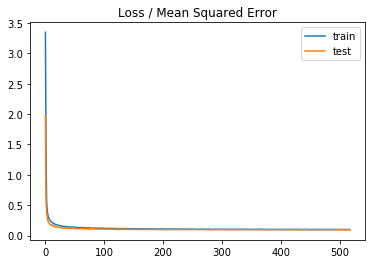

Training time is : 2.61  minute
======================Saving model==========================
Saved model to disk


In [8]:
model_3_tanh, train_mse , test_mse = training_NN(build_model_3_tanh,X_train, X_test, Y_train, Y_test,"test.h5",batch = 1000)

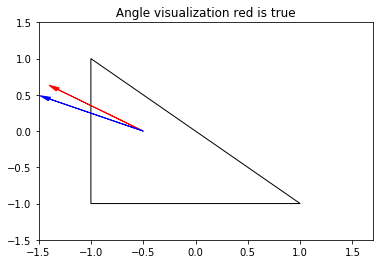

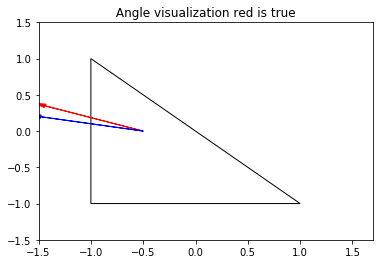

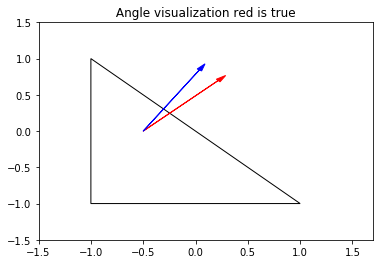

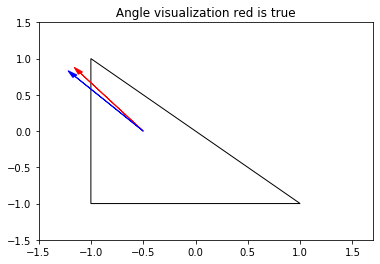

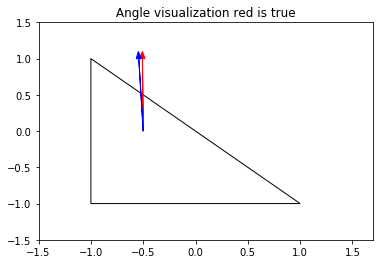

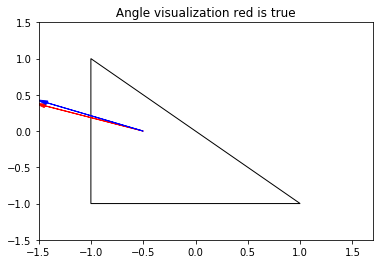

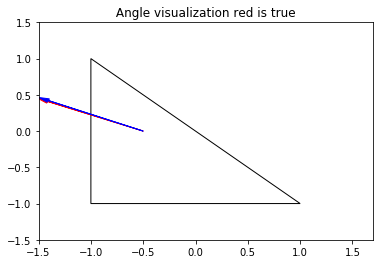

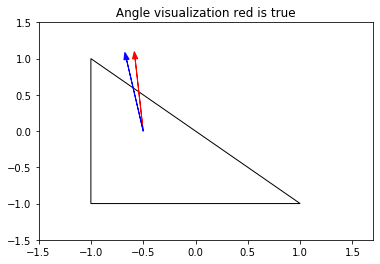

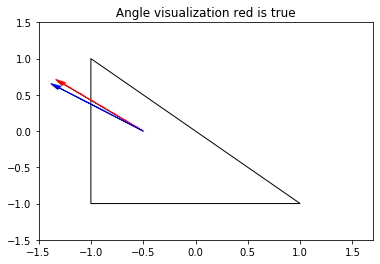

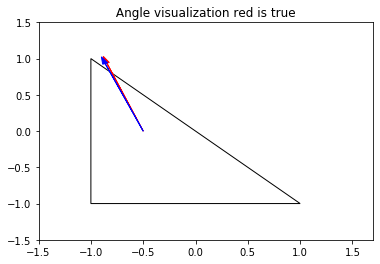

In [28]:
angle_visualization(model_3_tanh , X_test , Y_test)

In [20]:
y_hat = model_3_tanh.predict(X_test , verbose = 0)

In [21]:
error = y_hat-Y_test

In [25]:
indice = np.where(np.abs(error) >=1)[0]
print(indice.shape)

(735,)


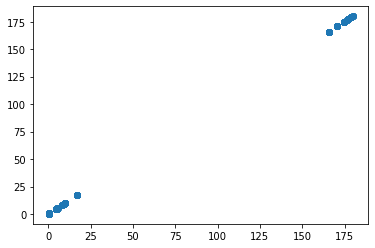

In [23]:
plt.scatter(Y_test[indice]*180/np.pi,Y_test[indice]*180/np.pi)

### Making prediction :

In [7]:
from keras.models import load_model
model_3_tanh = load_model('test.h5')

In [18]:
data_path_test_1 = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\mesh_square\\data_test_set_6_30.csv'

{'whiskers': [<matplotlib.lines.Line2D at 0x25d3dbb45f8>,
 'caps': [<matplotlib.lines.Line2D at 0x25d3dbb4c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x25d3dbb41d0>],
 'medians': [<matplotlib.lines.Line2D at 0x25d3dbb4f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x25d3dbbe6a0>],
 'means': []}

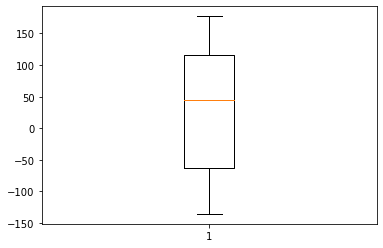

In [19]:
# load the data 
data = np.loadtxt(data_path_test_1, delimiter=',')
ind = data[:,0]
data= data[:,1:]
data.shape
plt.boxplot(data[:,-1]*180/np.pi)

In [23]:
test_mse = prediction_on_new_grid(data_path_test_1,'\data\pred_data_set_B_3_30.csv',model_3_tanh,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 0.0082
saving prediction ...
saving succed


In [8]:
data_path_test_2 = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\mesh_square\\data_test_set_6_60.csv'

loading data ... 
loading succed
on a new mesh the mse is : 1.2002


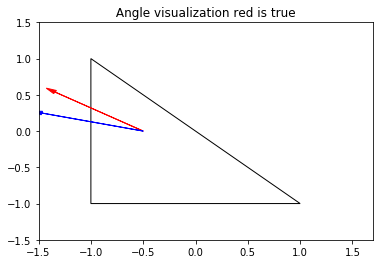

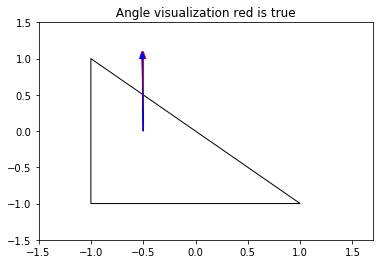

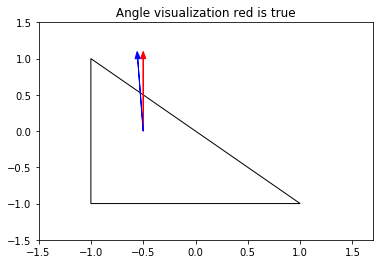

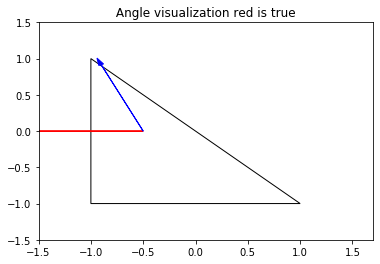

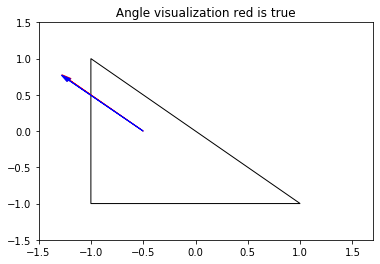

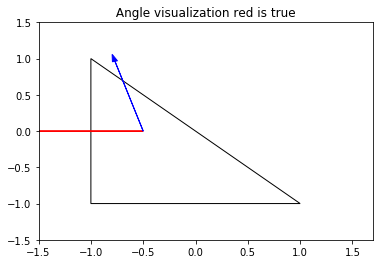

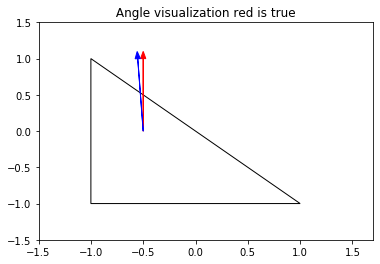

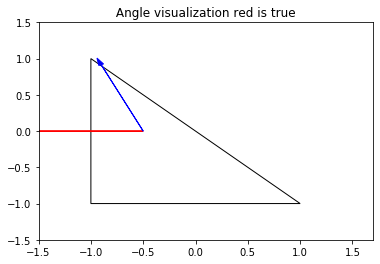

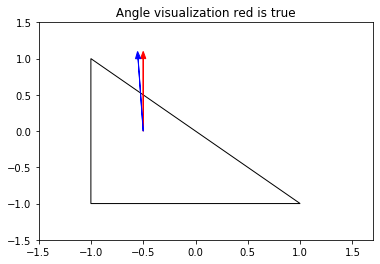

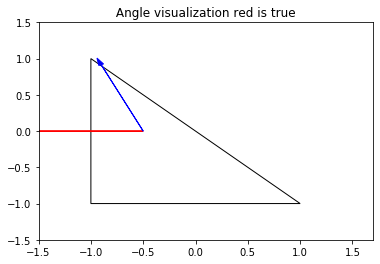

saving prediction ...
saving succed


In [9]:
test_mse  = prediction_on_new_grid(data_path_test_2,'\data\pred_data_set_B_3_60.csv',model_3_tanh,vizu = True ,normalized=True)

In [16]:
# load the data 
data = np.loadtxt(data_path_test_2, delimiter=',')
ind = data[:,0]
data= data[:,1:]
data.shape

(145, 41)

{'whiskers': [<matplotlib.lines.Line2D at 0x25d3db4d588>,
 'caps': [<matplotlib.lines.Line2D at 0x25d3db4dc18>,
 'boxes': [<matplotlib.lines.Line2D at 0x25d3db4d160>],
 'medians': [<matplotlib.lines.Line2D at 0x25d3db4def0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25d3db59630>],
 'means': []}

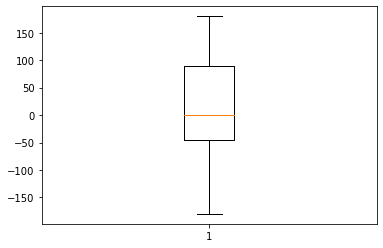

In [17]:
plt.boxplot(data[:,-1]*180/np.pi)

In [14]:
data[4,:]

array([-1.3333, -1.3333, -1.3333, -1.3333, -1.3333, -1.3333, -1.3333,
       -1.3333, -1.3333, -2.    , -1.3333, -1.3333, -1.3333, -1.3333,
       -1.3333, -1.3333, -1.3333, -1.3333, -1.3333, -1.3333, -1.3333,
       -1.3333, -1.3333, -2.    , -1.3333, -1.3333, -2.    , -1.3333,
       -2.    , -2.    , -2.    , -1.3333, -1.3333, -1.3333, -2.    ,
       -1.3333, -1.3333, -2.    , -1.3333, -2.    , -3.1396])

In [11]:
print(data[:,-1])

[ 2.5729e+00 -1.5708e+00  1.5708e+00  3.1416e+00 -7.8540e-01 -3.1420e-13
  1.5708e+00  3.1416e+00  1.5708e+00  3.1416e+00 -7.8540e-01  3.1434e-13
 -2.4408e-03 -2.7242e-13 -7.8540e-01  1.5708e+00  1.5708e+00 -7.8540e-01
  1.5708e+00  1.5708e+00  1.5708e+00 -3.1416e+00 -6.2904e-13  1.5810e-13
  2.5693e-13  1.0274e-13 -1.2911e-13 -7.8540e-01 -3.1416e+00  1.3372e-13
  1.5708e+00 -3.1416e+00  1.5708e+00  1.2506e-14  1.5708e+00  1.5708e+00
 -1.3564e-13  1.5708e+00  1.5708e+00  7.3896e-15  1.5708e+00 -3.1416e+00
  1.5708e+00  1.5708e+00  1.5708e+00  1.5708e+00  2.2963e-02  1.5708e+00
 -3.1416e+00  3.1416e+00 -9.8991e-12 -7.8540e-01  3.1416e+00  1.5708e+00
 -7.8540e-01 -7.8540e-01 -8.6168e-13 -3.1416e+00  1.5708e+00  2.0982e-12
  3.1416e+00  1.5708e+00  1.5708e+00  1.5708e+00 -2.8422e-16  1.5708e+00
  3.1416e+00 -7.8540e-01 -5.2012e-14  3.1416e+00 -7.8540e-01 -3.1416e+00
 -3.1416e+00 -1.3358e-14  3.0708e+00 -7.8540e-01 -3.1416e+00 -7.8540e-01
  7.9147e-13  3.1416e+00  2.8855e-13 -7.1765e-15 -3

In [26]:
data_path_test_3 = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\mesh_square\\data_test_set_6_90.csv'

In [27]:
test_mse = prediction_on_new_grid(data_path_test_3,'\data\pred_data_set_B_3_90.csv',model_3_tanh,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 0.0022
saving prediction ...
saving succed


In [28]:
data_path_test_4 = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\data\\test_set\\mesh_square\\data_test_set_6_circle.csv'

In [29]:
test_mse = prediction_on_new_grid(data_path_test_4,'\data\pred_data_set_B_3_circle.csv',model_3_tanh,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : nan
saving prediction ...
saving succed


#### trying to predict with model C

In [30]:
from keras.models import load_model
model_C = load_model('model_3_tanh_data_C_3.h5')

In [31]:
test_mse = prediction_on_new_grid(data_path_test_1,'\data\pred_data_set_B_3_30_model_C.csv',model_C,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 0.0095
saving prediction ...
saving succed


In [32]:
test_mse = prediction_on_new_grid(data_path_test_2,'\data\pred_data_set_B_3_60_model_C.csv',model_C,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 1.7507
saving prediction ...
saving succed


In [33]:
test_mse = prediction_on_new_grid(data_path_test_3,'\data\pred_data_set_B_3_90_model_C.csv',model_C,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 0.0036
saving prediction ...
saving succed


In [34]:
test_mse = prediction_on_new_grid(data_path_test_4,'\data\pred_data_set_B_3_circle_model_C.csv',model_C,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : nan
saving prediction ...
saving succed


### trying to predict with model A

In [36]:
from keras.models import load_model
model_A = load_model('model_3_tanh_data_3.h5')

In [37]:
test_mse = prediction_on_new_grid(data_path_test_1,'\data\pred_data_set_B_3_30_model_A.csv',model_A,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 0.0310
saving prediction ...
saving succed


In [38]:
test_mse = prediction_on_new_grid(data_path_test_2,'\data\pred_data_set_B_3_60_model_A.csv',model_A,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 1.8226
saving prediction ...
saving succed


In [39]:
test_mse = prediction_on_new_grid(data_path_test_3,'\data\pred_data_set_B_3_90_model_A.csv',model_A,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 0.0291
saving prediction ...
saving succed


In [40]:
test_mse = prediction_on_new_grid(data_path_test_4,'\data\pred_data_set_B_3_circle_model_A.csv',model_A,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : nan
saving prediction ...
saving succed


In [41]:
from keras.models import load_model
model_all = load_model('model_all_mesh.h5')

In [42]:
test_mse = prediction_on_new_grid(data_path_test_2,'\data\pred_data_set_B_3_60_model_ALL.csv',model_all,normalized=True)

loading data ... 
loading succed
on a new mesh the mse is : 1.3193
saving prediction ...
saving succed
